#Who Carries Harder?
*An NBA Data Science Mini-Project (2025 Playoffs)*  

This project explores which team, the Milwaukee Bucks or the Denver Nuggets,
would perform worse without their star player (Giannis Antetokounmpo vs. Nikola Jokic).  
Using points-per-possession data and a win% projection formula, I estimate
each team’s expected wins with and without their star.

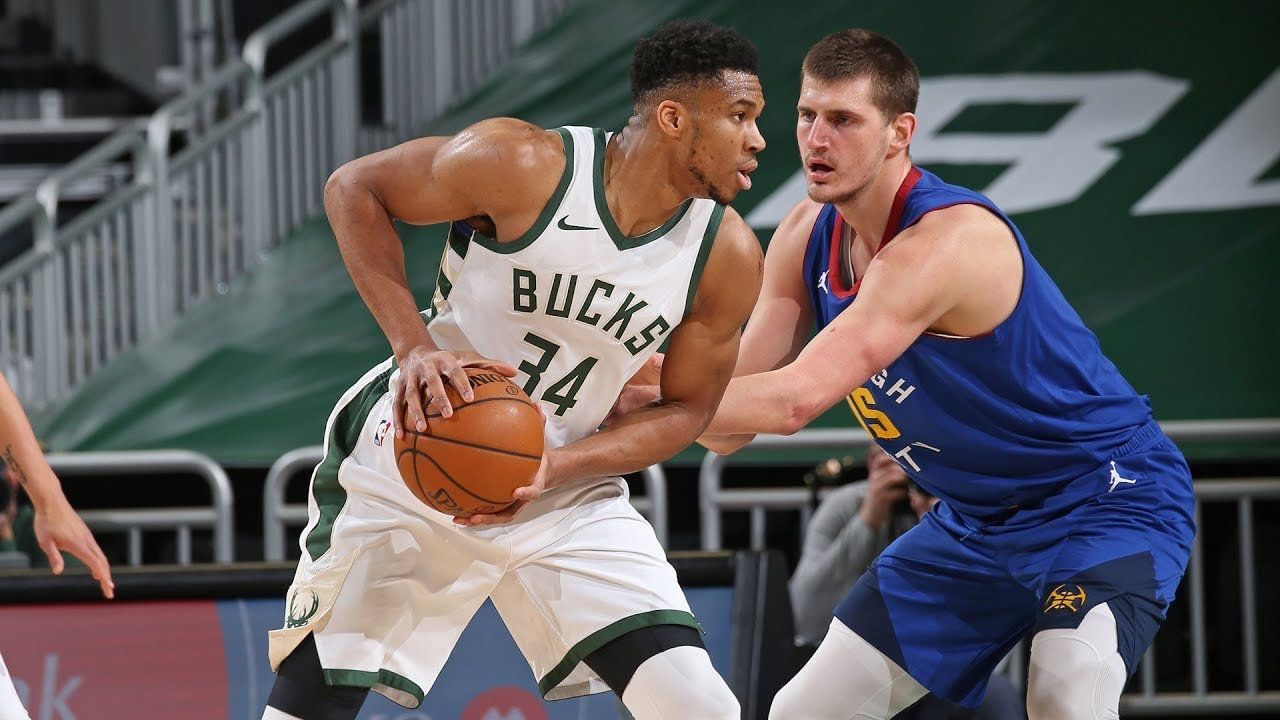

The 2025 NBA Playoffs have led to plenty of friendly debates. Last week, my friend and I argued about which team would be worse without their star player, the Milwaulkee Bucks or the Denver Nuggets. I was certain it was Denver and I opted for my first data science project of the summer to settle this debate.

To begin, we'll need the formula for estimated team winning percentage, and place it in a function.

In [ ]:
import math
def proj_win_percent(points_diff):
    """
    Estimate a team's winning percentage from its average point differential.

    Formula: Win% = ((points_diff * 2.7) + 41) / 82

    Args: points_diff (float): Average point differential per game(points scored - points allowed).
    """
    return ((points_diff*2.7)+41)/82

Perfect! Points differential is just the difference between total points scored and allowed per game. But I want to compare Denver and Milwaulkee's estimated win percentage with their stars on and off. Specific on/off data is often behind a pay wall, but there are workarounds to this. Thanks to Cleaning The Glass, I have access to points scored per 100 possessions played with a player on and the differential of the team.

In [ ]:
def find_point_diff(o_pts_w,d_pts_w,o_pts_wo,d_pts_wo):
  """
    Calculate offensive and defensive point differentials.

    Args:
        o_pts_w (float): Offensive points per 100 possessions with star on.
        d_pts_w (float): Defensive points allowed per 100 possessions with star on.
        o_pts_wo (float): Offensive points per 100 possessions without star.
        d_pts_wo (float): Defensive points allowed per 100 possessions without star.
    """
  return (o_pts_w-d_pts_w),(o_pts_wo-d_pts_wo)

Great! Now let's just calculate the points without from the differential statistics.

In [ ]:
def find_pts_wo(on_court,on_off_diff):
    """
    Estimate a team's stat without the star player, given on/off differential.

    Args:
        on_court (float): Team stat (offensive or defensive) with star on court.
        on_off_diff (float): On/off differential (impact of star being on).
    """
    return on_court - on_off_diff

I almost forgot that since these stats are per 100 possessions, and not actual points scored, we'll need to adjust for pace. To keep it simplistic, I'll be using the average pace per game from both teams. Ideally, I'd want pace with star on and off.

In [ ]:
def adjust_pace(diff,pace):
    """
    Adjust point differential (per 100 possessions) for team pace.

    Args:
        diff (float): Point differential per 100 possessions.
        pace (float): Average possessions per game for the team.
    """
    return (diff/100)*pace

Everything should be set! All that's needed now is to plug in the values.

In [ ]:
o_pts_w_giannis = 120.5
d_pts_w_giannis = 113.6
o_diff_giannis = 9.1
d_diff_giannis = -2.8
bucks_pace = 99.66

o_pts_w_jokic = 128.3
d_pts_w_jokic = 116.8
o_diff_jokic = 22.4
d_diff_jokic = 1.1
nuggets_pace = 100.71

In [ ]:
#Bucks Calculations
o_pts_wo_giannis = find_pts_wo(o_pts_w_giannis,o_diff_giannis)
d_pts_wo_giannis = find_pts_wo(d_pts_w_giannis,d_diff_giannis)

o_diff_bucks = find_point_diff(o_pts_w_giannis,d_pts_w_giannis,o_pts_wo_giannis,d_pts_wo_giannis)

adjusted_diff_w_giannis = adjust_pace(o_diff_bucks[0],bucks_pace)
adjusted_diff_wo_giannis = adjust_pace(o_diff_bucks[1],bucks_pace)

win_percent_giannis = proj_win_percent(adjusted_diff_w_giannis)
win_percent_giannis_wo = proj_win_percent(adjusted_diff_wo_giannis)

In [ ]:
#Nuggets Calculations
o_pts_wo_jokic = find_pts_wo(o_pts_w_jokic,o_diff_jokic)
d_pts_wo_jokic = find_pts_wo(d_pts_w_jokic,d_diff_jokic)

o_diff_nuggets = find_point_diff(o_pts_w_jokic,d_pts_w_jokic,o_pts_wo_jokic,d_pts_wo_jokic)

adjusted_diff_w_jokic = adjust_pace(o_diff_nuggets[0],nuggets_pace)
adjusted_diff_wo_jokic = adjust_pace(o_diff_nuggets[1],nuggets_pace)

win_percent_jokic = proj_win_percent(adjusted_diff_w_jokic)
win_percent_jokic_wo = proj_win_percent(adjusted_diff_wo_jokic)

What would a proper analysis be without a bar chart!

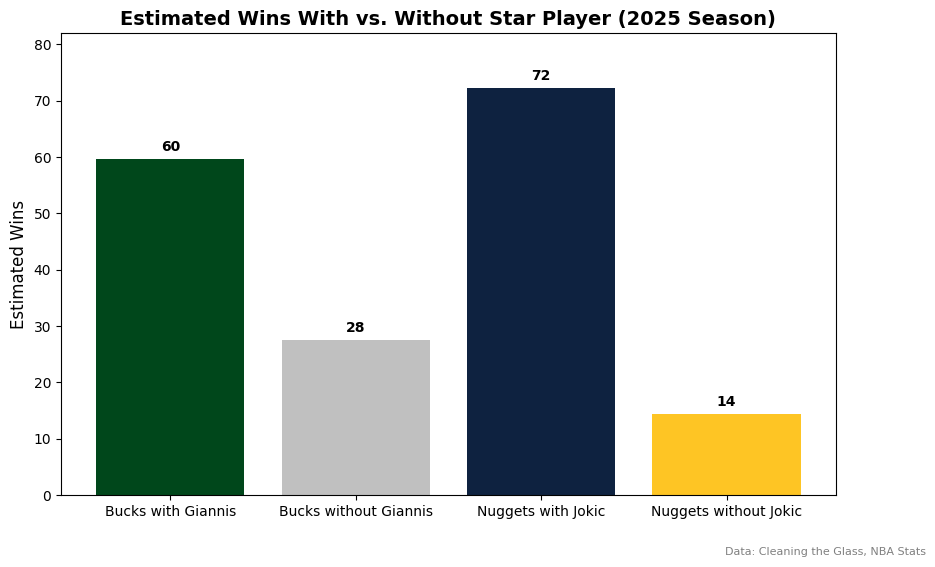

The Bucks would win 28 games while the Nuggets would win 14 games without either of their stars.


In [ ]:
import matplotlib.pyplot as plt

# Labels for scenarios
labels = [
    'Bucks with Giannis',
    'Bucks without Giannis',
    'Nuggets with Jokic',
    'Nuggets without Jokic'
]

# Estimated wins (over 82-game season)
values = [
    win_percent_giannis * 82,
    win_percent_giannis_wo * 82,
    win_percent_jokic * 82,
    win_percent_jokic_wo * 82
]

# Team colors: Bucks (green/gray), Nuggets (navy/gold)
colors = ['#00471B', '#C0C0C0', '#0E2240', '#FEC524']

plt.figure(figsize=(10, 6))

# Create bar chart
bars = plt.bar(labels, values, color=colors)

# Add text labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f"{round(height)}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title("Estimated Wins With vs. Without Star Player (2025 Season)", fontsize=14, fontweight='bold')
plt.ylabel("Estimated Wins", fontsize=12)
plt.ylim(0, 82)

# Source note (looks professional)
plt.figtext(0.99, 0.01, "Data: Cleaning the Glass, NBA Stats", ha='right', fontsize=8, color="gray")

plt.show()

# Console summary
print(
    f"The Bucks would win {round(win_percent_giannis_wo * 82)} games "
    f"while the Nuggets would win {round(win_percent_jokic_wo * 82)} games "
    f"without either of their stars."
)

## Conclusion
Without Giannis, the Bucks project to ~28 wins.  
Without Jokic, the Nuggets project to ~14 wins.  

So, without playoff Jamal Murray we can see the Nuggets are about half as good as the Bucks without Giannis. The Bucks even without the Greek Freak STILL are better than my Hornets. I hope this helps to settle some debates in the future.

In all seriousness, using this framework, **Jokić’s absence depresses team performance more than Giannis’s**. There are some assumptions (pace averaged, on/off proxies), so keep this as a directional estimate, not an exact forecast, but it’s a clear signal about single-player lift.